# Supervised ML Overview

Topics:

- Data Preparation
- Linear Regression vs Decision Trees
- Feature Engineering
- SKLearn Pipelines
- Evaluation on Test data and XGBoost

At its core supervised machine learning is creating a model to predict values based on features that are similar to the data that the model was trained on. The model is trained on a dataset that has both features and the target value that the model is trying to predict. 

There are many different models, this notebook will focus on linear models (linear regression, logistic regression) and tree based models (decision trees, random forests, gradient boosting). The reason for this is that these models are very common in industry and are a good starting point for understanding how machine learning models work.

Another important concept to understand is whether the model is memorizing the data or generalizing the data. Memorizing the data is when the model is too complicated (we call this overfitting) and is learning the noise in the data rather than the underlying pattern. Many models have **hyperparameters** that can be tuned to help prevent overfitting. Generalizing the data is when the model is learning the underlying pattern in the data and can make predictions on new data that it has never seen before.

## Data Prep

Don't run this, I'm leaving it here for reference.

In [ ]:
!pip install drawdata

In [ ]:
from drawdata import ScatterWidget
w = ScatterWidget()
w

In [ ]:
X, y = w.data_as_X_y

In [ ]:
(pd.DataFrame(X)
 .assign(color=y)
 # change color to green, blue and orange
 .assign(color=lambda df_:df_.color.replace({'#1f77b4':'blue', '#ff7f0e':'orange', '#2ca02c':'green'}))
 .groupby('color')
 .apply(lambda g:g)
 .rename(columns={0:'x', 1:'y'})
 .loc[:, ['x', 'y']]
 .reset_index()
 .loc[:, ['x', 'y', 'color']]
 .to_csv('linear_data.csv', index=False)
)

## Predicting Numbers

*Regression* is when the target value is a number. The most common model for regression is linear regression. This model tries to find the line that best fits the data. The line is defined by the equation `y = mx + b` where `m` is the slope of the line and `b` is the y-intercept. The model tries to find the values of `m` and `b` that minimize the error between the predicted value and the actual value.

We will explore linear regression and also decision trees.


In [1]:
import pandas as pd
data = pd.read_csv('linear_data.csv')


/Users/matt/.envs/menv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='x', ylabel='y'>

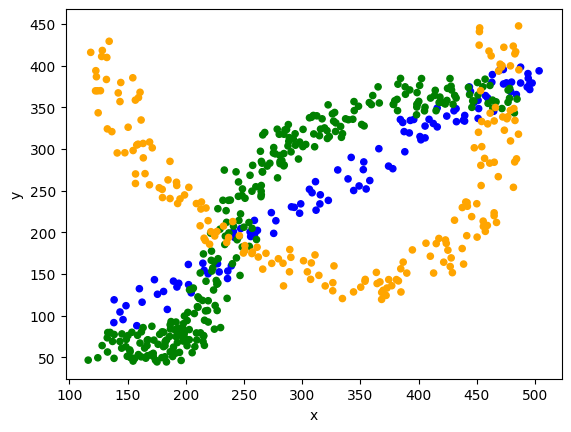

In [2]:
(data
# .query('color == "orange"')
 .plot.scatter(x='x', y='y', c='color', colormap='viridis')
)

In [3]:
line_data = (data
     .query('color == "blue"')
     .loc[:, ['x', 'y']]
)
X_line = line_data.loc[:, ['x']] 
y_line = line_data.loc[:, ['y']]

u_data = (data
     .query('color == "orange"')
     .loc[:, ['x', 'y']]
)
X_u = u_data.loc[:, ['x']]
y_u = u_data.loc[:, ['y']]

s_data = (data
     .query('color == "green"')
     .loc[:, ['x', 'y']]
)
X_s = s_data.loc[:, ['x']]
y_s = s_data.loc[:, ['y']]



In [5]:
y_line

,y
0,116.187389
1,119.024334
2,88.002452
3,111.975550
4,91.653833
...,...
104,371.429791
105,379.195309
106,378.690559
107,380.323815


### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_line, y_line)


LinearRegression()

In [7]:
model.intercept_

array([-20.07543713])

In [8]:
model.coef_

array([[0.83720273]])

/Users/matt/.envs/menv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


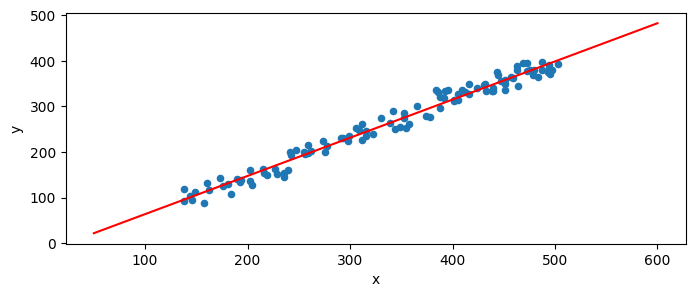

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 3))
line_data.plot.scatter(x='x', y='y', ax=ax)

vals = np.linspace(50, 600)
y_pred = model.predict(vals.reshape(-1, 1))
ax.plot(vals, y_pred, color='red')

/Users/matt/.envs/menv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


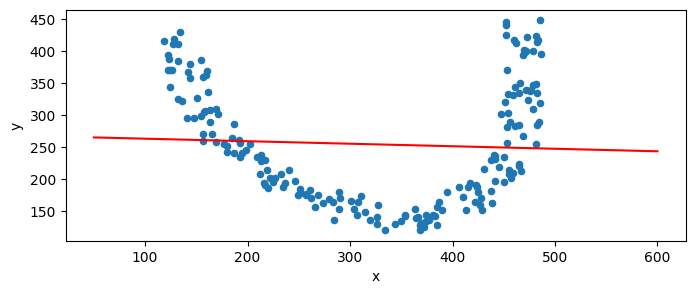

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 3))
u_data.plot.scatter(x='x', y='y', ax=ax)

vals = np.linspace(50, 600)
model_u = LinearRegression()
model_u.fit(X_u, y_u)

y_pred = model_u.predict(vals.reshape(-1, 1))
ax.plot(vals, y_pred, color='red')

/Users/matt/.envs/menv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


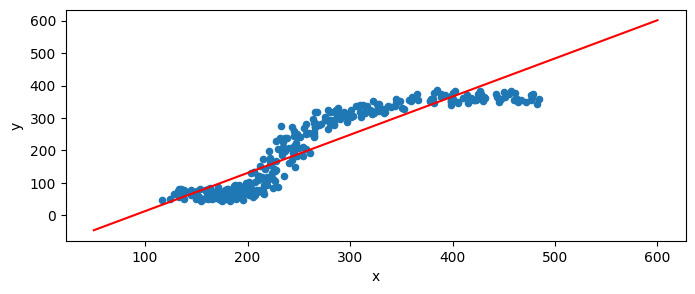

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 3))
s_data.plot.scatter(x='x', y='y', ax=ax)

vals = np.linspace(50, 600)
model_s = LinearRegression()
model_s.fit(X_s, y_s)

y_pred = model_s.predict(vals.reshape(-1, 1))
ax.plot(vals, y_pred, color='red')

### Tree Based Models

Linear regression doesn't have too many levers to pull that change the behavior of the model. A tree on the other hand has many hyperparameters that can be tuned to change the behavior of the model. Probably the most evident hyperparameter is the depth of the tree. The depth of the tree is how many splits the tree can make. The more splits the tree can make the more complicated the model can be. The more complicated the model the more likely the model is to overfit the data.

*Underfit Model* - It is easy to make an underfit model by making the tree too shallow. This is when the model is too simple and doesn't capture the underlying pattern in the data. Let's make a *decision stump* which is a tree with only one split.

/Users/matt/.envs/menv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


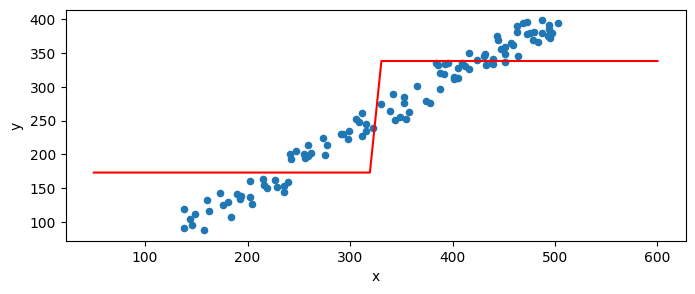

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

fig, ax = plt.subplots(figsize=(8, 3))
line_data.plot.scatter(x='x', y='y', ax=ax)

vals = np.linspace(50, 600)
stump_line = tree.DecisionTreeRegressor(max_depth=1)
stump_line.fit(X_line, y_line)

y_pred = stump_line.predict(vals.reshape(-1, 1))
ax.plot(vals, y_pred, color='red')

[Text(0.5, 0.75, 'x[0] <= 326.428\nsquared_error = 8681.039\nsamples = 109\nvalue = 265.448'),
 Text(0.25, 0.25, 'squared_error = 2402.995\nsamples = 48\nvalue = 173.203'),
 Text(0.75, 0.25, 'squared_error = 1656.658\nsamples = 61\nvalue = 338.034')]

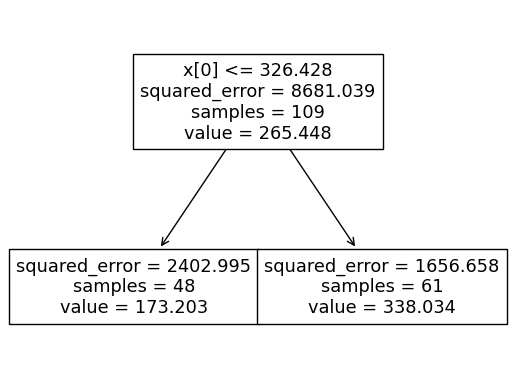

In [17]:
# visualize stump

from sklearn import tree

tree.plot_tree(stump_line)


*Overfit model* - On the other hand it is easy to make an overfit model by making the tree too deep. This is when the model is too complicated and is learning the noise in the data rather than the underlying pattern. Let's make a tree that is too deep.

/Users/matt/.envs/menv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


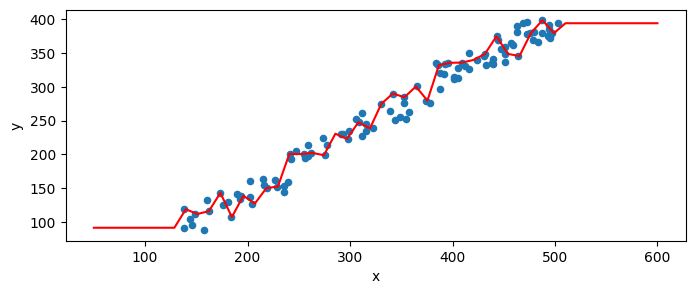

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

fig, ax = plt.subplots(figsize=(8, 3))
line_data.plot.scatter(x='x', y='y', ax=ax)

vals = np.linspace(50, 600)
tree_of = tree.DecisionTreeRegressor(max_depth=None)
tree_of.fit(X_line, y_line)

y_pred = tree_of.predict(vals.reshape(-1, 1))
ax.plot(vals, y_pred, color='red')

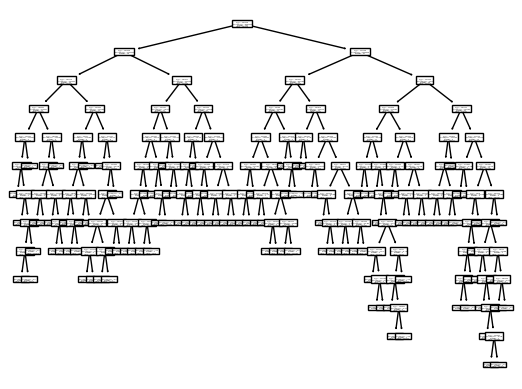

In [19]:
# visualize tree

from sklearn import tree

res = tree.plot_tree(tree_of)


/Users/matt/.envs/menv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


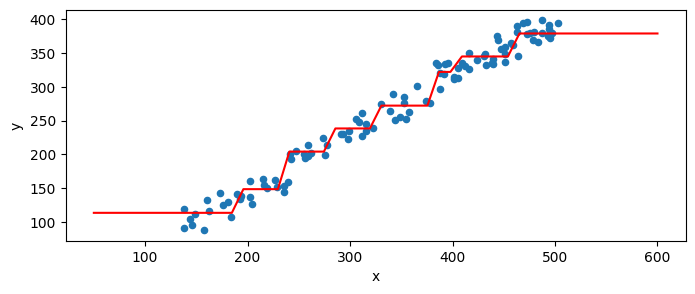

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

fig, ax = plt.subplots(figsize=(8, 3))
line_data.plot.scatter(x='x', y='y', ax=ax)

vals = np.linspace(50, 600)
tree_u = tree.DecisionTreeRegressor(max_depth=3)
tree_u.fit(X_line, y_line)

y_pred = tree_u.predict(vals.reshape(-1, 1))
ax.plot(vals, y_pred, color='red')

/Users/matt/.envs/menv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


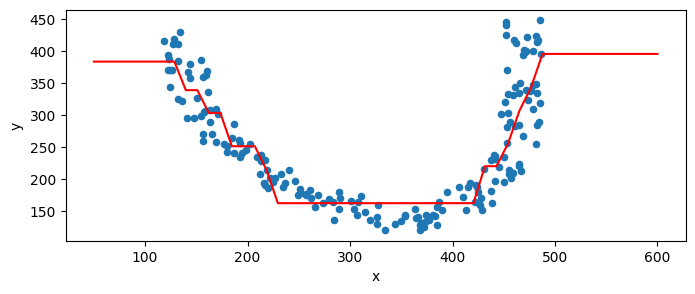

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

fig, ax = plt.subplots(figsize=(8, 3))
u_data.plot.scatter(x='x', y='y', ax=ax)

vals = np.linspace(50, 600)
tree_u = tree.DecisionTreeRegressor(max_depth=4)
tree_u.fit(X_u, y_u)

y_pred = tree_u.predict(vals.reshape(-1, 1))
ax.plot(vals, y_pred, color='red')

/Users/matt/.envs/menv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


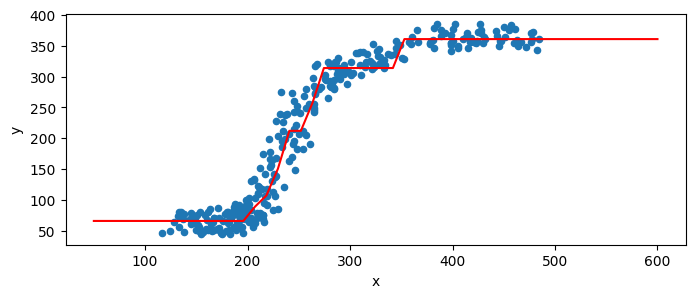

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

fig, ax = plt.subplots(figsize=(8, 3))
s_data.plot.scatter(x='x', y='y', ax=ax)

vals = np.linspace(50, 600)
tree_u = tree.DecisionTreeRegressor(max_depth=3)
tree_u.fit(X_s, y_s)

y_pred = tree_u.predict(vals.reshape(-1, 1))
ax.plot(vals, y_pred, color='red')

## Feature Engineering

Feature engineering is the process of creating new features from the existing features in the dataset. This can be as simple as squaring a feature or as complicated as creating a new feature from multiple features. Feature engineering is a very important part of creating a good model. A model is only as good as the features that are fed into it.

Let's add some features to the U-shaped dataset to see if we can make a better model.

First let's calculate the metrics for the U-shaped dataset.

Here are common regression metrics:

- *R2* - Coefficient of determination. How much of the variance in the target variable is explained by the model. 1 is perfect, 0 is as good as guessing the mean, and negative is worse than guessing the mean.
- *MSE* - Mean squared error. The average of the squared differences between the predicted value and the actual value. Lower is better.
- *MAE* - Mean absolute error. The average of the absolute differences between the predicted value and the actual value. Lower is better.
- *RMSE* - Root mean squared error. The square root of the mean squared error. Lower is better.
- *MAPE* - Mean absolute percentage error. The average of the absolute percentage differences between the predicted value and the actual value. Lower is better.

In [25]:
from sklearn import metrics

u_model = LinearRegression()
u_model.fit(X_u, y_u)
r2 = metrics.r2_score(y_u, u_model.predict(X_u))
mse = metrics.mean_squared_error(y_u, u_model.predict(X_u))
mae = metrics.mean_absolute_error(y_u, u_model.predict(X_u))
rmse = metrics.root_mean_squared_error(y_u, u_model.predict(X_u))
mape = metrics.mean_absolute_percentage_error(y_u, u_model.predict(X_u))
print(f'{r2=:.3f}, {mse=:.3f}, {mae=:.3f}, {rmse=:.3f}, {mape=:.3f}')

r2=0.003, mse=8533.908, mae=80.041, rmse=92.379, mape=0.359


In [26]:
from sklearn import metrics

u_model3 = tree.DecisionTreeRegressor(max_depth=3)

model = u_model3
X = X_u
y = y_u
model.fit(X, y)
r2 = metrics.r2_score(y, model.predict(X))
mse = metrics.mean_squared_error(y, model.predict(X))
mae = metrics.mean_absolute_error(y, model.predict(X))
rmse = metrics.root_mean_squared_error(y, model.predict(X))
mape = metrics.mean_absolute_percentage_error(y, model.predict(X))
print(f'{r2=:.3f}, {mse=:.3f}, {mae=:.3f}, {rmse=:.3f}, {mape=:.3f}')

r2=0.816, mse=1573.770, mae=30.988, rmse=39.671, mape=0.131


<AxesSubplot: xlabel='x', ylabel='y'>

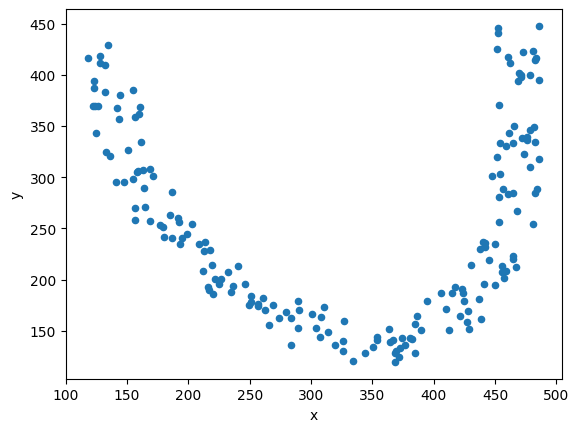

In [27]:
(data
 .query('color == "orange"')
 .plot.scatter(x='x', y='y')
)

In [28]:
from sklearn import metrics

u_model2 = LinearRegression()

X_ufe = (X_u
         .assign(x2=X_u.x**2))
model = u_model2
X = X_ufe
y = y_u
model.fit(X, y)
r2 = metrics.r2_score(y, model.predict(X))
mse = metrics.mean_squared_error(y, model.predict(X))
mae = metrics.mean_absolute_error(y, model.predict(X))
rmse = metrics.root_mean_squared_error(y, model.predict(X))
mape = metrics.mean_absolute_percentage_error(y, model.predict(X))
print(f'{r2=:.3f}, {mse=:.3f}, {mae=:.3f}, {rmse=:.3f}, {mape=:.3f}')

r2=0.751, mse=2133.322, mae=34.745, rmse=46.188, mape=0.142


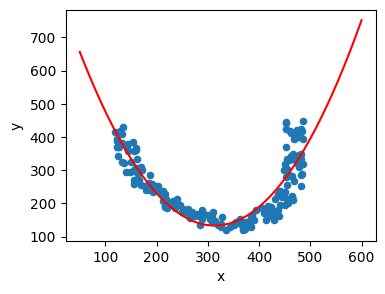

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

fig, ax = plt.subplots(figsize=(4, 3))
u_data.plot.scatter(x='x', y='y', ax=ax)

vals = np.linspace(50, 600)
X = pd.DataFrame({'x':vals, 'x2':vals**2})

y_pred = u_model2.predict(X)
ax.plot(vals, y_pred, color='red')

In [31]:
# try to fix the right side
from sklearn import metrics

u_model4 = LinearRegression()

X_ufe = (X_u
         .assign(x2=X_u.x**2,
                 x3=lambda df_:(df_.x > 350) & (df_.x < 450)
                 )
)
model = u_model4
X = X_ufe
y = y_u
model.fit(X, y)
r2 = metrics.r2_score(y, model.predict(X))
mse = metrics.mean_squared_error(y, model.predict(X))
mae = metrics.mean_absolute_error(y, model.predict(X))
rmse = metrics.root_mean_squared_error(y, model.predict(X))
mape = metrics.mean_absolute_percentage_error(y, model.predict(X))
print(f'{r2=:.3f}, {mse=:.3f}, {mae=:.3f}, {rmse=:.3f}, {mape=:.3f}')

r2=0.793, mse=1769.898, mae=29.259, rmse=42.070, mape=0.113


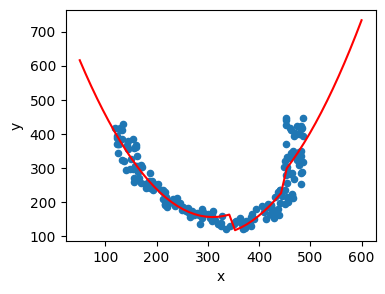

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

fig, ax = plt.subplots(figsize=(4, 3))
u_data.plot.scatter(x='x', y='y', ax=ax)

vals = np.linspace(50, 600)
X = pd.DataFrame({'x':vals, 'x2':vals**2,
                  'x3':(vals > 350) & (vals < 450)
                    })

y_pred = u_model4.predict(X)
ax.plot(vals, y_pred, color='red')

## SKLearn Pipelines

SKLearn pipelines are a way to chain together multiple steps in the machine learning process. This can be very useful for making sure that the same steps are applied to the training and testing data. It can also be useful for making sure that the same steps are applied to the training and validation data when doing cross validation.

Training vs testing data - The training data is the data that the model is trained on. The testing data is the data that the model is evaluated on. The model should never see the testing data until it is time to evaluate the model. This is to make sure that the model is generalizing the data and not memorizing the data.

In [2]:
import numpy as np
import pandas as pd
url = 'https://www.fueleconomy.gov/feg/epadata/vehicles.csv' 

raw = pd.read_csv(url, dtype_backend='pyarrow', engine='pyarrow')
cols = ['year', 'make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr',
    'barrels08', 'city08', 'comb08', 'range', 'evMotor', 'cylinders', 'displ', 'fuelCost08', 
        'fuelType', 'highway08',  'trans_dscr','createdOn']

autos = (raw
    .loc[:, cols]
    .assign(random=lambda df_: np.random.RandomState(42).normal(size=len(df_)),
        random_cat=lambda df_: pd.Series(np.random.RandomState(42).randint(0, 4, size=len(df_)), dtype='category')
    )
)
autos

,year,make,model,trany,drive,VClass,eng_dscr,barrels08,city08,comb08,...,evMotor,cylinders,displ,fuelCost08,fuelType,highway08,trans_dscr,createdOn,random,random_cat
0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(FFS),14.167143,19,21,...,<NA>,4,2.0,2450,Regular,25,<NA>,Tue Jan 01 00:00:00 EST 2013,0.496714,2
1,1985,Ferrari,Testarossa,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(GUZZLER),27.046364,9,11,...,<NA>,12,4.9,4700,Regular,14,<NA>,Tue Jan 01 00:00:00 EST 2013,-0.138264,3
2,1985,Dodge,Charger,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,(FFS),11.018889,23,27,...,<NA>,4,2.2,1900,Regular,33,SIL,Tue Jan 01 00:00:00 EST 2013,0.647689,0
3,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Rear-Wheel Drive,Vans,<NA>,27.046364,10,11,...,<NA>,8,5.2,4700,Regular,12,<NA>,Tue Jan 01 00:00:00 EST 2013,1.523030,2
4,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,"(FFS,TRBO)",15.658421,17,19,...,<NA>,4,2.2,3400,Premium,23,<NA>,Tue Jan 01 00:00:00 EST 2013,-0.234153,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47518,1993,Subaru,Legacy,Automatic 4-spd,Front-Wheel Drive,Compact Cars,(FFS),13.523182,19,22,...,<NA>,4,2.2,2350,Regular,26,CLKUP,Tue Jan 01 00:00:00 EST 2013,-0.069131,1
47519,1993,Subaru,Legacy,Manual 5-spd,Front-Wheel Drive,Compact Cars,(FFS),12.935217,20,23,...,<NA>,4,2.2,2250,Regular,28,<NA>,Tue Jan 01 00:00:00 EST 2013,1.135233,3
47520,1993,Subaru,Legacy AWD,Automatic 4-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,18,21,...,<NA>,4,2.2,2450,Regular,24,CLKUP,Tue Jan 01 00:00:00 EST 2013,0.468933,3
47521,1993,Subaru,Legacy AWD,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,18,21,...,<NA>,4,2.2,2450,Regular,24,<NA>,Tue Jan 01 00:00:00 EST 2013,-1.113898,2


In [3]:
# predict city08
x_cols = ['year', 'make', 'model', 'trany', 'drive', 'VClass', 
          'eng_dscr', 'barrels08', 'range', 'evMotor', 
          'cylinders', 'displ', 'fuelCost08', 'fuelType',
            'trans_dscr', 'createdOn', 'random', 'random_cat']
X = (autos
     .loc[:, x_cols]
)
y = autos.loc[:, 'city08']

In [4]:
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r1.fit(X, y)

ValueError: could not convert string to float: 'Alfa Romeo'

### Categorical Data

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config

set_config(transform_output='pandas')


ohe = OneHotEncoder(sparse_output=False)
ohe.fit_transform(X[['make']])


,make_AM General,make_ASC Incorporated,make_Acura,make_Alfa Romeo,make_American Motors Corporation,make_Aston Martin,make_Audi,make_Aurora Cars Ltd,make_Autokraft Limited,make_Avanti Motor Corporation,...,make_VPG,make_Vector,make_Vinfast,make_Vixen Motor Company,make_Volga Associated Automobile,make_Volkswagen,make_Volvo,make_Wallace Environmental,make_Yugo,make_smart
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config
set_config(transform_output='pandas')

ohe = OneHotEncoder(sparse_output=False, drop='first', max_categories=10)
ohe.fit_transform(X[['make']])


,make_Chevrolet,make_Dodge,make_Ford,make_GMC,make_Mercedes-Benz,make_Nissan,make_Porsche,make_Toyota,make_infrequent_sklearn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
47518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ct = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', max_categories=10), ['make'])
])
ct.fit_transform(X)

,ohe__make_Chevrolet,ohe__make_Dodge,ohe__make_Ford,ohe__make_GMC,ohe__make_Mercedes-Benz,ohe__make_Nissan,ohe__make_Porsche,ohe__make_Toyota,ohe__make_infrequent_sklearn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
47518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
X.select_dtypes('string').columns

Index(['make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr', 'evMotor',
       'fuelType', 'trans_dscr', 'createdOn'],
      dtype='object')

In [40]:
# for missing values you can say
# handle_unknown='ignore'
cat_cols = ['make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr', 'evMotor',
       'fuelType', 'trans_dscr', 'random_cat']
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', max_categories=10), cat_cols)
])
ct.fit_transform(X)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['NAType', 'str']

### Missing Data

We need to deal with missing data before we can train a model. There are many ways to deal with missing data. We can drop the rows with missing data, we can fill the missing data with the mean, median, or mode of the column, or we can use a machine learning model to predict the missing data. (Note that some models can handle missing data natively, like XGBoost)

In [8]:
# find the missing values
(X
 .isna()
 .sum()
)

year              0
make              0
model             0
trany            11
drive          1186
VClass            0
eng_dscr      17442
barrels08         0
range             0
evMotor       45086
cylinders       801
displ           799
fuelCost08        0
fuelType          0
trans_dscr    32479
createdOn         0
random            0
random_cat        0
dtype: int64

In [9]:
(X
 .query('drive.isna()')
)

,year,make,model,trany,drive,VClass,eng_dscr,barrels08,range,evMotor,cylinders,displ,fuelCost08,fuelType,trans_dscr,createdOn,random,random_cat
7138,2000,Nissan,Altra EV,<NA>,<NA>,Midsize Station Wagons,<NA>,0.096,90,62 KW AC Induction,<NA>,<NA>,900,Electricity,<NA>,Tue Jan 01 00:00:00 EST 2013,-0.527994,2
8144,2001,Ford,Th!nk,<NA>,<NA>,Two Seaters,<NA>,0.1248,29,27 KW AC Induction,<NA>,<NA>,1150,Electricity,<NA>,Tue Jan 01 00:00:00 EST 2013,1.084501,0
8147,2001,Nissan,Hyper-Mini,<NA>,<NA>,Two Seaters,<NA>,0.108,33,24 KW AC Synchronous,<NA>,<NA>,1000,Electricity,<NA>,Tue Jan 01 00:00:00 EST 2013,1.664642,0
18214,1984,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,<NA>,Two Seaters,(FFS),14.167143,0,<NA>,4,2.0,2450,Regular,<NA>,Tue Jan 01 00:00:00 EST 2013,-3.335902,0
18215,1984,Bertone,X1/9,Manual 5-spd,<NA>,Two Seaters,(FFS),13.523182,0,<NA>,4,1.5,2350,Regular,<NA>,Tue Jan 01 00:00:00 EST 2013,1.283889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23019,1999,GMC,EV1,Automatic (A1),<NA>,Two Seaters,Lead Acid,0.096,55,102kW AC Induction,<NA>,<NA>,900,Electricity,<NA>,Tue Jan 01 00:00:00 EST 2013,-1.229195,2
23020,1999,GMC,EV1,Automatic (A1),<NA>,Two Seaters,NiMH,0.2184,105,102kW AC Induction,<NA>,<NA>,2050,Electricity,<NA>,Tue Jan 01 00:00:00 EST 2013,-0.537955,2
23022,1999,Honda,EV Plus,Automatic (A1),<NA>,Compact Cars,<NA>,0.1704,81,49kW DC Brushless,<NA>,<NA>,1600,Electricity,<NA>,Tue Jan 01 00:00:00 EST 2013,1.374984,1
23027,1998,Honda,EV Plus,Automatic (A1),<NA>,Compact Cars,<NA>,0.1704,81,49 kW DC Brushless,<NA>,<NA>,1600,Electricity,<NA>,Tue Jan 01 00:00:00 EST 2013,0.414267,0


In [10]:
X.drive.value_counts()

drive
Front-Wheel Drive             15492
Rear-Wheel Drive              15333
4-Wheel or All-Wheel Drive     6645
All-Wheel Drive                5464
4-Wheel Drive                  2315
Part-time 4-Wheel Drive         581
2-Wheel Drive                   507
Name: count, dtype: int64[pyarrow]

In [11]:
# https://github.com/scikit-learn/scikit-learn/issues/29291
from sklearn.impute import SimpleImputer

drive_imputer = SimpleImputer(strategy='constant', fill_value='Other')
drive_imputer.fit_transform(X[['drive']])

AttributeError: 'bool' object has no attribute 'transpose'

In [12]:
# https://github.com/scikit-learn/scikit-learn/issues/29291
from sklearn.impute import SimpleImputer

drive_imputer = SimpleImputer(strategy='constant', fill_value='Other')
drive_imputer.fit_transform(X[['drive']].astype(str))

array([['Rear-Wheel Drive'],
       ['Rear-Wheel Drive'],
       ['Front-Wheel Drive'],
       ...,
       ['4-Wheel or All-Wheel Drive'],
       ['4-Wheel or All-Wheel Drive'],
       ['4-Wheel or All-Wheel Drive']], dtype=object)

In [15]:
# this still has <NA> 
# unless I replace them with np.nan...
from sklearn.pipeline import Pipeline

drive_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Other')),
   ('ohe', OneHotEncoder(sparse_output=False, drop='first', max_categories=10))
])

drive_pipe.fit_transform(X[['drive']].astype(str)
                # replace drive "<NA>" with np.nan
                .assign(drive=lambda df_: df_.drive.replace('<NA>', np.nan))
                )

,drive_4-Wheel Drive,drive_4-Wheel or All-Wheel Drive,drive_All-Wheel Drive,drive_Front-Wheel Drive,drive_Other,drive_Part-time 4-Wheel Drive,drive_Rear-Wheel Drive
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
47518,0.0,0.0,0.0,1.0,0.0,0.0,0.0
47519,0.0,0.0,0.0,1.0,0.0,0.0,0.0
47520,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47521,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Custom Python Transformer

Sometimes we need to create a custom transformer to do something that SKLearn doesn't have built in. This can be done by creating a class that inherits from `BaseEstimator` and `TransformerMixin` and has a `.fit` and `.transform` method.

I'm going to demo this by making a transformer that converts pyarrow strings to pandas strings and replaces `'<NA>'` with `np.nan`

In [16]:
# I'm going to demo this by making a transformer that converts pyarrow strings to pandas strings and replaces `'<NA>'` with `np.nan`
from sklearn.base import BaseEstimator, TransformerMixin

class PyArrowStringConverter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return (X
            .assign(**X.select_dtypes('string').astype(str).replace('<NA>', np.nan))
        )

str_transformer = PyArrowStringConverter()
str_transformer.fit_transform(X).dtypes

year           int64[pyarrow]
make                   object
model                  object
trany                  object
drive                  object
VClass                 object
eng_dscr               object
barrels08     double[pyarrow]
range          int64[pyarrow]
evMotor                object
cylinders      int64[pyarrow]
displ         double[pyarrow]
fuelCost08     int64[pyarrow]
fuelType               object
trans_dscr             object
createdOn              object
random                float64
random_cat           category
dtype: object

In [17]:
str_transformer.fit_transform(X).drive.value_counts(dropna=False)

drive
Front-Wheel Drive             15492
Rear-Wheel Drive              15333
4-Wheel or All-Wheel Drive     6645
All-Wheel Drive                5464
4-Wheel Drive                  2315
NaN                            1186
Part-time 4-Wheel Drive         581
2-Wheel Drive                   507
Name: count, dtype: int64

### Pipeline

In [18]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config

set_config(transform_output='pandas')

class PyArrowStringConverter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return (X
            .assign(**X.select_dtypes('string').astype(str).replace('<NA>', np.nan))
        )

cat_cols = ['make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr', 'evMotor',
       'fuelType', 'trans_dscr', 'random_cat']

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Other')),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', max_categories=10))
])   

num_cols = ['year', 'barrels08', 'range', 'cylinders', 'displ', 'fuelCost08', 'random']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std', StandardScaler())
])

pipeline = Pipeline([
    ('str_transformer', PyArrowStringConverter()),
    ('cols', ColumnTransformer([
        ('cat', cat_pipeline, cat_cols),
        ('nums', num_pipeline, num_cols)],
        remainder='drop')),
])

pipeline.fit(X)

Pipeline(steps=[('str_transformer', PyArrowStringConverter()),
                ('cols',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 max_categories=10,
                                                                                 sparse_output=False))]),
                                                  ['make', 'model', 'trany',
                                                   'drive', 'VClass',
                                                   'eng_dscr', 'evMotor',
                                                   'fuelType', 'trans_dscr',
                                                   'random_cat']),
                                                 ('nums',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['year', 'barrels08', 'range',
                                                   'cylinders', 'displ',
                                                   'fuelCost08',
                                                   'random'])]))])

In [19]:
pipeline.fit_transform(X)

,cat__make_Chevrolet,cat__make_Dodge,cat__make_Ford,cat__make_GMC,cat__make_Mercedes-Benz,cat__make_Nissan,cat__make_Porsche,cat__make_Toyota,cat__make_infrequent_sklearn,cat__model_Camaro,...,cat__random_cat_1,cat__random_cat_2,cat__random_cat_3,nums__year,nums__barrels08,nums__range,nums__cylinders,nums__displ,nums__fuelCost08,nums__random
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-1.540010,-0.224159,-0.122818,-0.968263,-0.948343,-0.487557,0.498319
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-1.540010,2.645421,-0.122818,3.584050,1.212336,2.156486,-0.137096
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.540010,-0.925612,-0.122818,-0.968263,-0.799331,-1.133878,0.649397
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.540010,2.645421,-0.122818,1.307893,1.435854,2.156486,1.525341
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.901743,0.108108,-0.122818,-0.968263,-0.799331,0.628817,-0.233051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,-0.901743,-0.367638,-0.122818,-0.968263,-0.799331,-0.605070,-0.067916
47519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.901743,-0.498641,-0.122818,-0.968263,-0.799331,-0.722583,1.137277
47520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.901743,-0.224159,-0.122818,-0.968263,-0.799331,-0.487557,0.470519
47521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.901743,-0.224159,-0.122818,-0.968263,-0.799331,-0.487557,-1.113401


## Split Data

It is imperative that we split the data into training and testing data. This is to make sure that the model is generalizing the data and not memorizing the data. The model should never see the testing data until it is time to evaluate the model.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(pipeline.transform(X_train), y_train)
lr.score(pipeline.transform(X_test), y_test)


0.9233913115339142

In [21]:
# add handle unknown and debug_transformer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config

set_config(transform_output='pandas')

def debug_transformer(X, name):
    globals()[name] = X
    return X

class PyArrowStringConverter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return (X
            .assign(**X.select_dtypes('string').astype(str).replace('<NA>', np.nan))
        )

cat_cols = ['make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr', 'evMotor',
       'fuelType', 'trans_dscr', 'random_cat']

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Other')),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', max_categories=10,
        handle_unknown='ignore')),
    ('debug', FunctionTransformer(debug_transformer, kw_args={'name':'cat_X'}))
])   

num_cols = ['year', 'barrels08', 'range', 'cylinders', 'displ', 'fuelCost08', 'random']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std', StandardScaler())
])

pipeline = Pipeline([
    ('str_transformer', PyArrowStringConverter()),
    ('cols', ColumnTransformer([('cat', cat_pipeline, cat_cols),
        ('nums', num_pipeline, num_cols)],
        remainder='drop')),
])

pipeline.fit(X)

Pipeline(steps=[('str_transformer', PyArrowStringConverter()),
                ('cols',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=10,
                                                                                 sparse_output=False)),
                                                                  ('debug',
                                                                   FunctionTransformer(func=<function debug_transformer at 0x17ec33490>,
                                                                                       kw_args={'name': 'cat_X'}))]),
                                                  ['make', 'model', 'trany',
                                                   'drive', 'VClass',
                                                   'eng_dscr', 'evMotor',
                                                   'fuelType', 'trans_dscr',
                                                   'random_cat']),
                                                 ('nums',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['year', 'barrels08', 'range',
                                                   'cylinders', 'displ',
                                                   'fuelCost08',
                                                   'random'])]))])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(pipeline.transform(X_train), y_train)
lr.score(pipeline.transform(X_test), y_test)


0.9233913115339142

In [23]:
# debug transformer
cat_X

,cat__make_Chevrolet,cat__make_Dodge,cat__make_Ford,cat__make_GMC,cat__make_Mercedes-Benz,cat__make_Nissan,cat__make_Porsche,cat__make_Toyota,cat__make_infrequent_sklearn,cat__model_Camaro,...,cat__trans_dscr_3MODE CLKUP,cat__trans_dscr_CLKUP,cat__trans_dscr_Creeper,cat__trans_dscr_EMS 2MODE CLKUP,cat__trans_dscr_Other,cat__trans_dscr_SIL,cat__trans_dscr_infrequent_sklearn,cat__random_cat_1,cat__random_cat_2,cat__random_cat_3
45362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
36795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
# try an xgboost model

from xgboost import XGBRegressor

xgb = XGBRegressor(enable_categorical=True)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

KeyError: 'string[pyarrow]'

In [27]:
# try an xgboost model

from xgboost import XGBRegressor

# create a transformer to convert pyarrow string to categorical
class ToCategorical(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return (X
            .assign(**X.select_dtypes('string').astype('category'))
        )

xgb = XGBRegressor(enable_categorical=True)
xgb.fit(ToCategorical().fit_transform(X_train), y_train)
xgb.score(ToCategorical().transform(X_test), y_test)

0.9422240103091428

## Conclusion

One of the reasons I like XGBoost is because:

- It limits the amount of preprossing
- It tends to perform well (though it is most likely overfitting)

Next week, we will explore XGBoost